
please mount google drive before you begin

# Part I: Set-up

In [1]:
cd /content/drive/MyDrive/DEX_Uniswap_Layer2/Arb

/content/drive/MyDrive/DEX_Uniswap_Layer2/Arb


In [2]:
pwd

'/content/drive/MyDrive/DEX_Uniswap_Layer2/Arb'

In [3]:
# importing pandas libraries and
# glob module
import pandas as pd

In [9]:
df_Arb = pd.read_csv("Arb_Amount.csv",index_col="Unnamed: 0")
df_Arb['Timestamp']=pd.to_datetime(df_Arb['Timestamp'])
df_Arb.dtypes

Timestamp     datetime64[ns]
Amount_USD           float64
dtype: object

In [10]:
df_Arb.tail()

,Timestamp,Amount_USD
154532,2022-12-31 23:59:39,0.000000
163665,2022-12-31 23:59:41,0.029934
148361,2022-12-31 23:59:48,10.204658
148362,2022-12-31 23:59:48,10.226345
147693,2022-12-31 23:59:58,0.010006


In [12]:
df_Arb['date'] =df_Arb['Timestamp'].dt.date
df_Arb

,Timestamp,Amount_USD,date
8826512,2021-08-31 05:14:10,0.000000,2021-08-31
8823005,2021-08-31 05:21:55,0.000000,2021-08-31
8825384,2021-08-31 05:22:36,0.000000,2021-08-31
8825590,2021-08-31 07:15:16,0.000000,2021-08-31
8821886,2021-08-31 14:47:56,0.000000,2021-08-31
...,...,...,...
154532,2022-12-31 23:59:39,0.000000,2022-12-31
163665,2022-12-31 23:59:41,0.029934,2022-12-31
148361,2022-12-31 23:59:48,10.204658,2022-12-31
148362,2022-12-31 23:59:48,10.226345,2022-12-31


# Part II Calculating Daily Transaction Volume

In [13]:
import numpy as np
# Calculate statistics for 'Amount_USD' column and add count of observations
agg_funcs = {
    'Amount_USD': [np.min, np.max, np.sum, np.std, np.var, np.mean, np.median, lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 25)]
}

# Add count of observations
agg_funcs['Amount_USD'].append(lambda x: x.count())

# Convert the 'date' column to datetime
#df_Arb['date'] = pd.to_datetime(df_Arb['date'])
df_Arb_volume = df_Arb.groupby('date').agg(agg_funcs).reset_index()

# Rename the columns for clarity
df_Arb_volume.columns = ['date', 'min', 'max', 'sum', 'std', 'var', 'mean', 'median', 'percentile_75', 'percentile_25', 'count']

df_Arb_volume

,date,min,max,sum,std,var,mean,median,percentile_75,percentile_25,count
0,2021-08-31,0.000000,9943.547280,3.384306e+04,983.724354,9.677136e+05,270.744477,34.152839,202.468518,0.000000,125
1,2021-09-01,0.000013,27776.881913,6.591094e+05,2824.941148,7.980292e+06,1191.879637,266.893840,1108.633373,28.064439,553
2,2021-09-02,0.100072,37738.270940,6.633942e+05,1979.983966,3.920337e+06,964.235701,782.174901,1133.615180,83.008601,688
3,2021-09-03,0.027728,14107.372500,5.079475e+05,1509.414087,2.278331e+06,960.203212,979.864091,1178.366121,45.219963,529
4,2021-09-04,0.039122,5816.206845,2.929509e+05,729.522502,5.322031e+05,620.658638,579.977528,773.712073,181.030320,472
...,...,...,...,...,...,...,...,...,...,...,...
483,2022-12-27,0.000000,258567.380461,3.286255e+07,4137.277871,1.711707e+07,1035.106165,12.477633,449.078577,0.048087,31748
484,2022-12-28,0.000000,193487.248009,2.974231e+07,4187.627190,1.753622e+07,1051.634067,19.959910,498.659648,0.042830,28282
485,2022-12-29,0.000000,120088.116518,2.373038e+07,2996.498994,8.979006e+06,876.338718,9.986296,397.404619,0.011985,27079
486,2022-12-30,0.000000,427948.038158,2.321897e+07,4998.593593,2.498594e+07,902.689154,10.000632,245.980277,0.027463,25722


In [14]:
df_Arb_volume.to_csv("Arb_volume.csv")

In [15]:
df_Arb_volume.dtypes

date              object
min              float64
max              float64
sum              float64
std              float64
var              float64
mean             float64
median           float64
percentile_75    float64
percentile_25    float64
count              int64
dtype: object

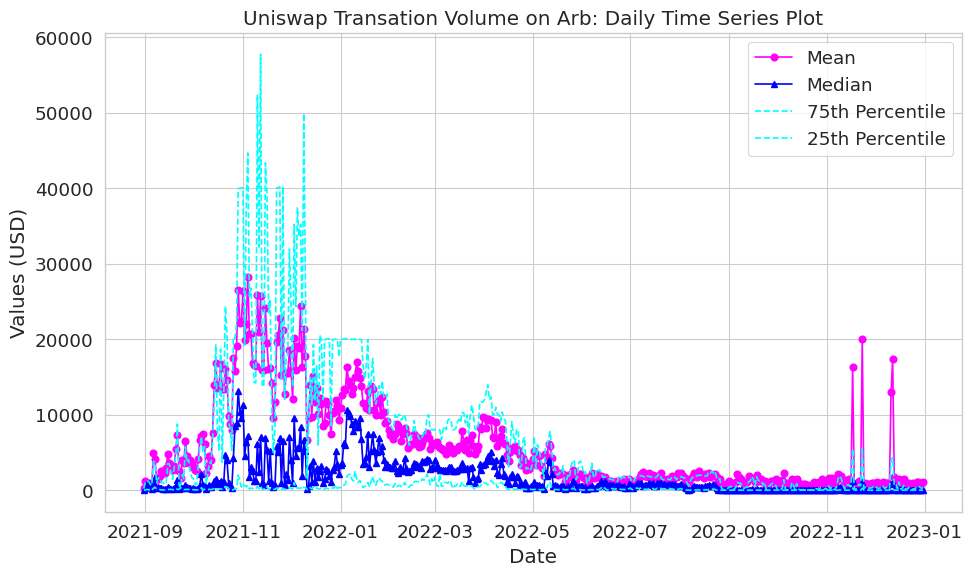

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df =df_Arb_volume.copy()
df['date'] = pd.to_datetime(df['date'])
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'mean' with a warm color and solid line
plt.plot(df.index, df['mean'], label='Mean', marker='o', color='magenta', linestyle='-')

# Plot 'median', '75th Percentile', and '25th Percentile' with the same cold color and different markers
plt.plot(df.index, df['median'], label='Median', marker='^', color='blue', linestyle='-')
plt.plot(df.index, df['percentile_75'], label='75th Percentile', color='cyan', linestyle='--')
plt.plot(df.index, df['percentile_25'], label='25th Percentile',  color='cyan', linestyle='--')

# Customize the plot
plt.title('Uniswap Transation Volume on Arb: Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values (USD)')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Arb_volume.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


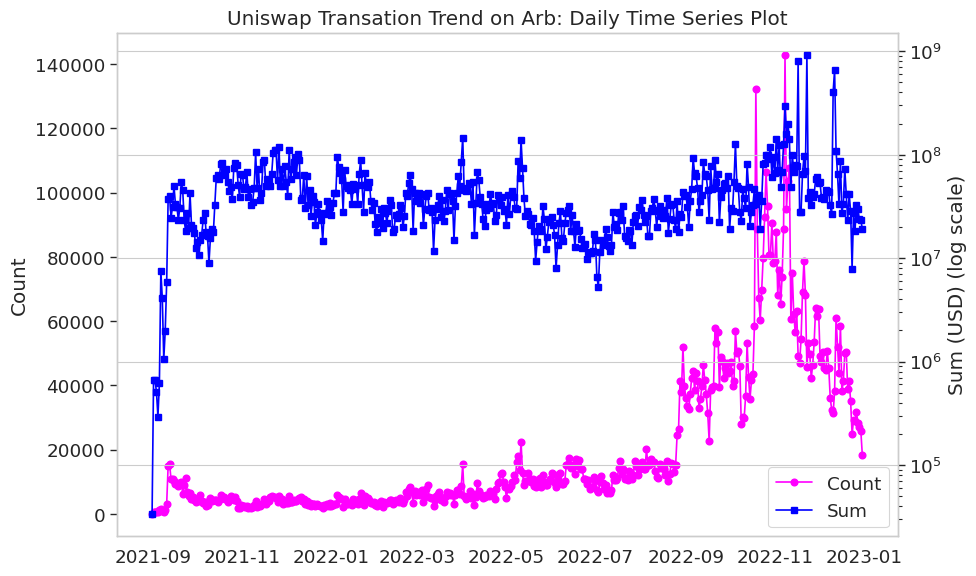

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df_Arb_volume['date'] = pd.to_datetime(df_Arb_volume['date'])

df =df_Arb_volume.copy()
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'count' on the primary y-axis
count_line, = plt.plot(df.index, df['count'], label='Count', marker='o', color='magenta', linestyle='-')
plt.ylabel('Count')

# Create a secondary y-axis for 'sum' with a logarithmic scale
ax2 = plt.twinx()
ax2.set_yscale("log")  # Apply logarithmic scale to the secondary y-axis
sum_line, = ax2.plot(df.index, df['sum'], label='Sum', marker='s', color='blue', linestyle='-')
ax2.set_ylabel('Sum (USD) (log scale)')

# Combine legends from both axes
lines = [count_line, sum_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower right')

# Customize the plot
plt.title('Uniswap Transation Trend on Arb: Daily Time Series Plot')
plt.xlabel('Date')
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Arb_transaction_trend.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


# Part III Calculating Decentralized Index

In [19]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz

In [20]:
def index(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = (df['Amount_USD']/df['Amount_USD'].sum())*100
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'Amount_USD' not in df.columns:
        return None
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['Amount_USD'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df):
    df.sort_values(by=['Amount_USD'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V
    except:
        return 0

"""
def index_calc(data):

            :param data: dataframe containing transaction Amount_USD and timestamp of the transaction (Timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index Amount_USD and date
"""
from tqdm import tqdm
def index_calc(data,  start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['date'] >= start_date) & (data['date'] < end_date)].copy())

    return IndexValues

In [22]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results = index_calc(df_Arb,start,end)
results.to_csv("Arb_Entropy.csv")
results

  0%|          | 0/488 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  2%|▏         | 11/488 [00:12<09:08,  1.15s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  2%|▏         | 12/488 [00:13<08:55,  1.13s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  3%|▎         | 14/488 [00:15<08:43,  1.11s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  3%|▎         | 15/488 [00:16<08:33,  1.09s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: Run

,val,date
0,22.061877,2021-08-31
1,158.322708,2021-09-01
2,320.833852,2021-09-02
3,250.323614,2021-09-03
4,290.765909,2021-09-04
...,...,...
483,4826.010896,2022-12-27
484,4455.942565,2022-12-28
485,4512.720794,2022-12-29
486,3075.727319,2022-12-30


In [23]:
df = pd.read_csv("Arb_Entropy.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,4826.010896,2022-12-27
484,4455.942565,2022-12-28
485,4512.720794,2022-12-29
486,3075.727319,2022-12-30
487,1849.539464,2022-12-31


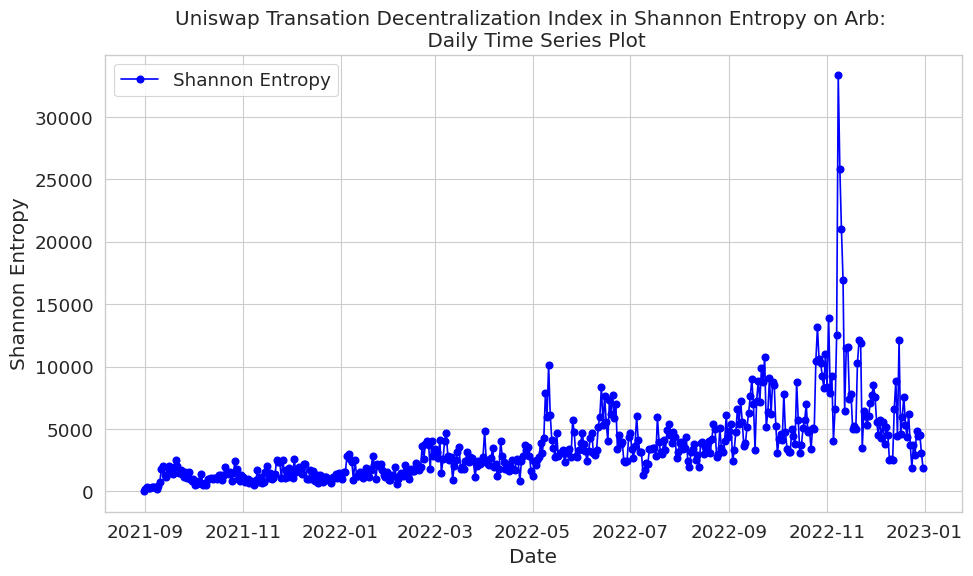

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Shannon Entropy', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Shannon Entropy on Arb: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Arb_entropy.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [25]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results_HHI = index_calc(df_Arb,start,end,HHI)
results_HHI.to_csv("Arb_HHI.csv")
results_HHI

100%|██████████| 488/488 [08:32<00:00,  1.05s/it]


,val,date
0,1127.681545,2021-08-31
1,119.484320,2021-09-01
2,75.732822,2021-09-02
3,65.527971,2021-09-03
4,50.394902,2021-09-04
...,...,...
483,5.346852,2022-12-27
484,5.959945,2022-12-28
485,4.686822,2022-12-29
486,12.309358,2022-12-30


In [26]:
df = pd.read_csv("Arb_HHI.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,5.346852,2022-12-27
484,5.959945,2022-12-28
485,4.686822,2022-12-29
486,12.309358,2022-12-30
487,23.371148,2022-12-31


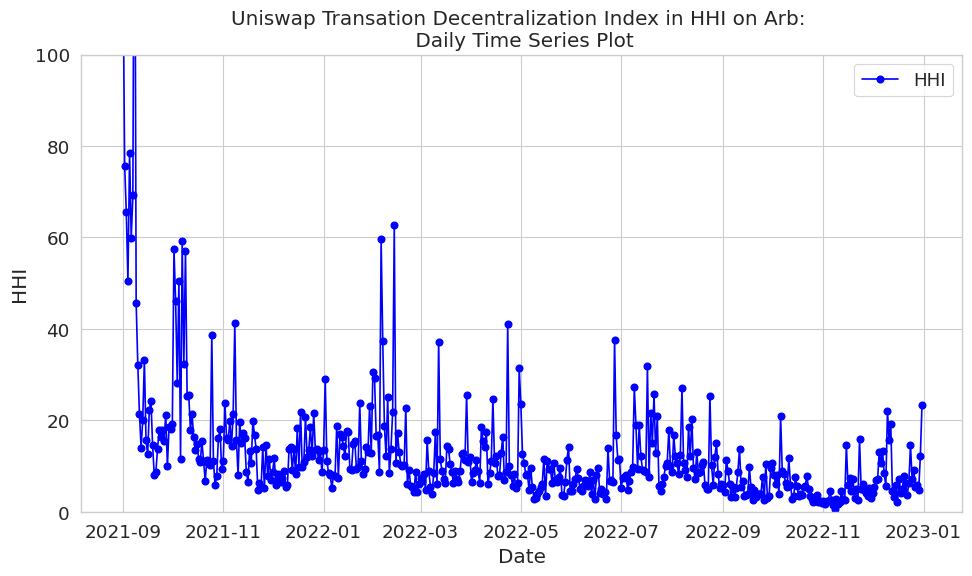

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='HHI', marker='o',color='blue')


# Customize the plot
plt.ylim(0, 100)  # Set y-axis limits
plt.title('Uniswap Transation Decentralization Index in HHI on Arb: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Arb_HHI.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [32]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results_gini = index_calc(df_Arb,start,end,gini)
results_gini.to_csv("Arb_gini.csv")
results_gini

100%|██████████| 488/488 [08:39<00:00,  1.06s/it]


,val,date
0,0.831384,2021-08-31
1,0.769387,2021-09-01
2,0.581338,2021-09-02
3,0.589225,2021-09-03
4,0.501935,2021-09-04
...,...,...
483,0.872264,2022-12-27
484,0.865804,2022-12-28
485,0.866284,2022-12-29
486,0.891489,2022-12-30


In [33]:
df = pd.read_csv("Arb_gini.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,0.872264,2022-12-27
484,0.865804,2022-12-28
485,0.866284,2022-12-29
486,0.891489,2022-12-30
487,0.894455,2022-12-31


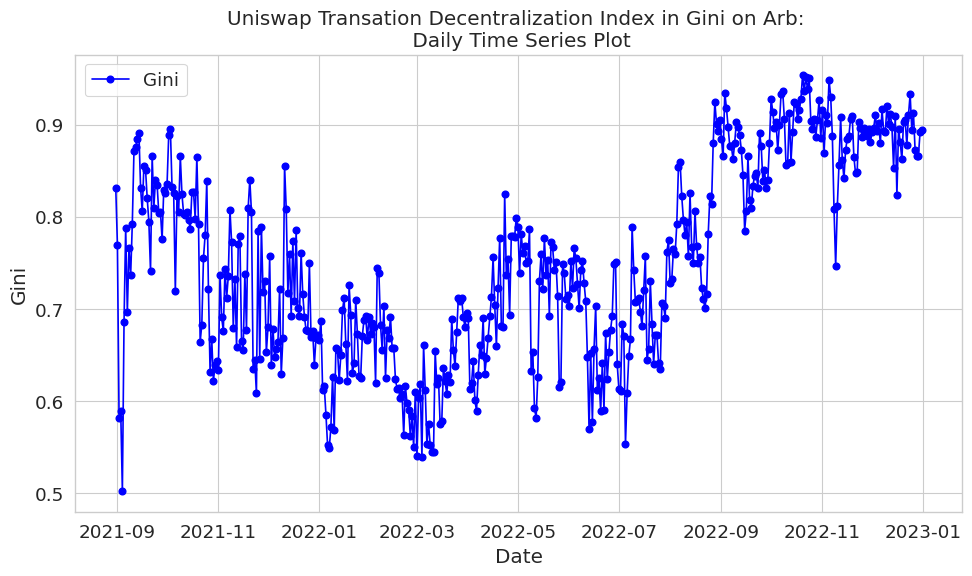

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Gini', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Gini on Arb: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Gini')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Arb_gini.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [35]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results_nakamoto = index_calc(df_Arb,start,end,nakamoto)
results_nakamoto.to_csv("Arb_nakamoto.csv")
results_nakamoto

100%|██████████| 488/488 [08:38<00:00,  1.06s/it]


,val,date
0,4.0,2021-08-31
1,36.0,2021-09-01
2,103.0,2021-09-02
3,83.0,2021-09-03
4,88.0,2021-09-04
...,...,...
483,1331.0,2022-12-27
484,1194.0,2022-12-28
485,1216.0,2022-12-29
486,798.0,2022-12-30


In [36]:
df = pd.read_csv("Arb_nakamoto.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,1331.0,2022-12-27
484,1194.0,2022-12-28
485,1216.0,2022-12-29
486,798.0,2022-12-30
487,437.0,2022-12-31


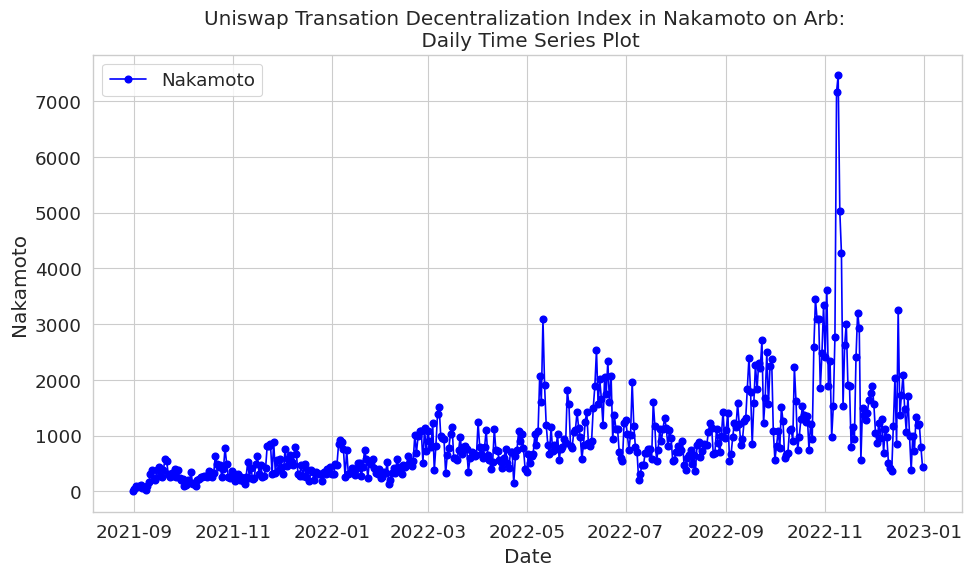

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Nakamoto', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Nakamoto on Arb: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Nakamoto')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Arb_nakamoto.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()
